In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data= pd.read_csv("UpdatedResumeDataSet.csv")

In [5]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
data.shape

(962, 2)

In [7]:
data["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

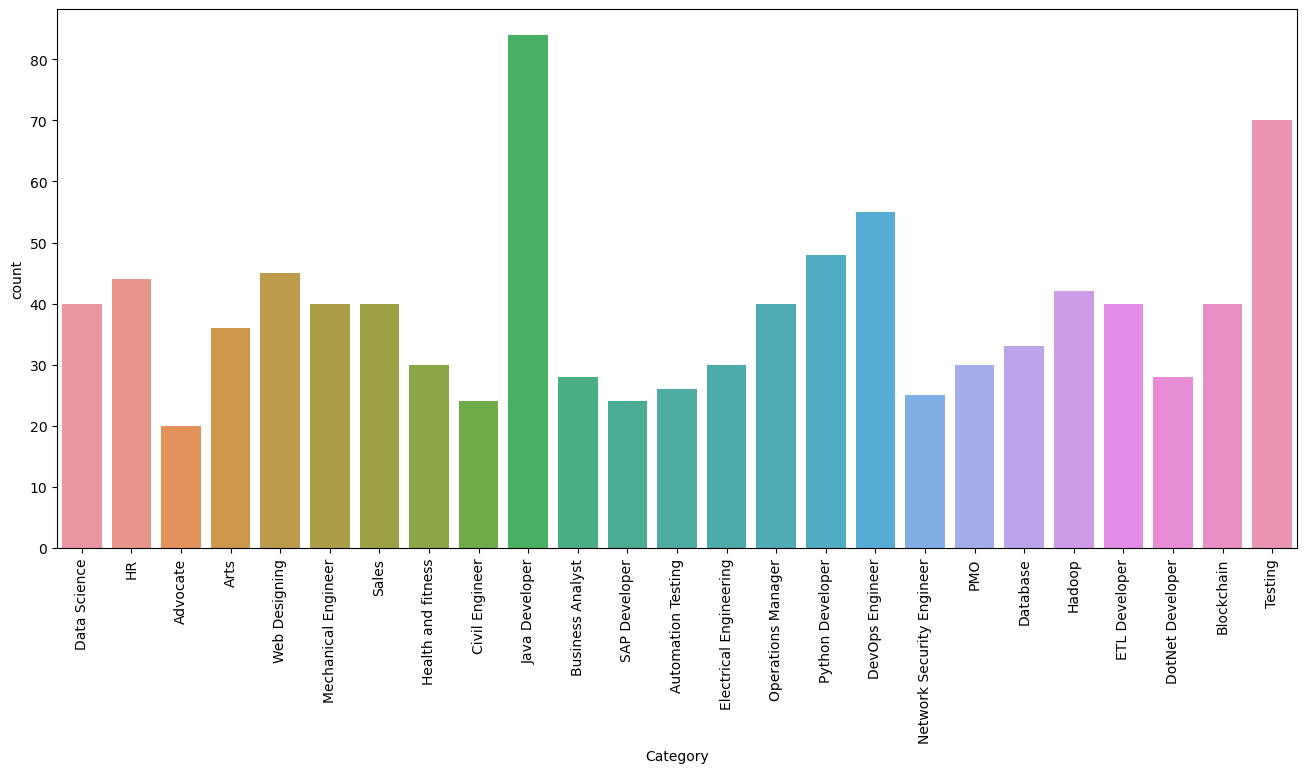

In [8]:
plt.figure(figsize=(16,7))
sns.countplot(data["Category"])
plt.xticks(rotation= 90)
plt.show()

In [9]:
# Pie Chart

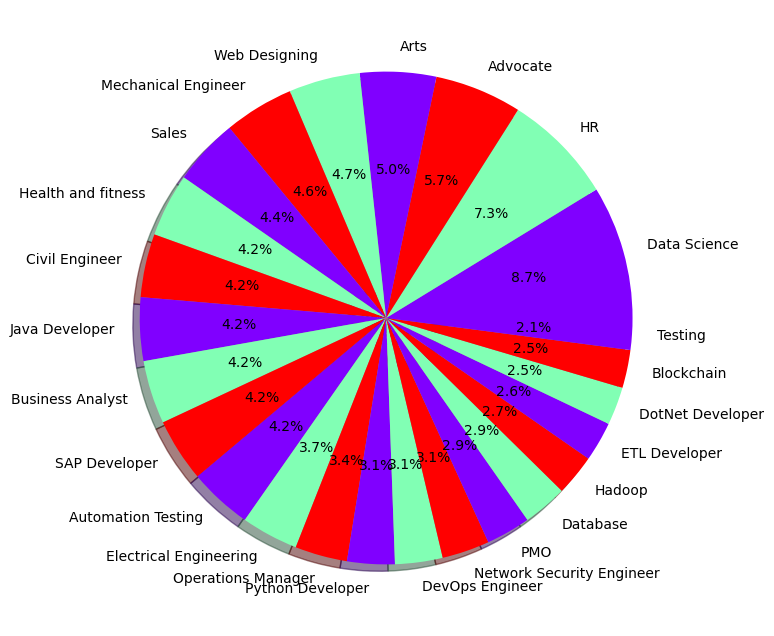

In [10]:

counts = data["Category"].value_counts()
labels = data["Category"].unique()

plt.figure(figsize=(15,8))
plt.pie(counts, labels=labels,autopct="%1.1f%%", shadow= True,colors=plt.cm.rainbow(np.linspace(0,1,3)))
plt.show()

# Exploring Resume

In [11]:
data["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data

- URLS
- hastags
- mentions
- Special Letter
- puncuation

In [12]:
import re

def cleanText(txt):
    clean_urls=re.sub("http\S+\s"," ",txt)
    cleantxt=re.sub("@\S+\s"," ",clean_urls)
    cleantxt=re.sub("RT-cc",'',cleantxt)
    cleantxt=re.sub('@\S+',' ',cleantxt)
    cleantxt=re.sub('[%s]'%re.escape("""!"#$%&''()-*+,./:;<=>?@[\]^_{|}~""")," ",cleantxt)
    cleantxt= re.sub(r'[^\x00-\x7f]',' ',cleantxt)
    cleantxt=re.sub('\s+',' ',cleantxt)
    
    return cleantxt

In [13]:
data["Resume"]= data["Resume"].apply(lambda x: cleanText(x))

In [14]:
data["Resume"][1]

'Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github co

# Words into Categorical Value

In [15]:
data["Category"]

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

# Encoding

In [16]:
data["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [51]:
du=data["Category"].unique()

In [47]:
le= LabelEncoder()
le.fit(data["Category"])
data["transformed"]=le.transform(data["Category"])

In [52]:
tu = data["transformed"].unique()

In [68]:
pd.DataFrame({"Original":du}, index=tu)


,Original
6,Data Science
12,HR
0,Advocate
1,Arts
24,Web Designing
16,Mechanical Engineer
22,Sales
14,Health and fitness
5,Civil Engineer
15,Java Developer


# Vectorization

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf.fit(data["Resume"])
vector=tfidf.transform(data["Resume"])

In [54]:
x = vector

y = data["transformed"]

# Splitting

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)


In [25]:
x_train.shape

(769, 7347)

In [26]:
x_test.shape

(193, 7347)

# Model Training

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics  import accuracy_score

In [28]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7))
clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
print(ypred)

['Arts' 'Operations Manager' 'Data Science' 'Data Science' 'Database'
 'Business Analyst' 'Testing' 'ETL Developer' 'Database'
 'Python Developer' 'PMO' 'Electrical Engineering' 'Testing' 'Testing'
 'Operations Manager' 'Health and fitness' 'Arts'
 'Network Security Engineer' 'Blockchain' 'Data Science'
 'Electrical Engineering' 'Network Security Engineer' 'Java Developer'
 'SAP Developer' 'Operations Manager' 'Hadoop' 'Web Designing'
 'Java Developer' 'Network Security Engineer' 'Java Developer' 'Hadoop'
 'Web Designing' 'Web Designing' 'ETL Developer' 'Sales'
 'Automation Testing' 'Java Developer' 'Blockchain' 'Automation Testing'
 'Testing' 'Operations Manager' 'Testing' 'Business Analyst'
 'Java Developer' 'Java Developer' 'PMO' 'Business Analyst'
 'ETL Developer' 'Blockchain' 'Arts' 'Operations Manager' 'Hadoop'
 'Operations Manager' 'Automation Testing' 'HR' 'Testing' 'Sales'
 'Blockchain' 'DevOps Engineer' 'Sales' 'Automation Testing'
 'ETL Developer' 'Operations Manager' 'Block

# Model Evaluation

In [29]:
accuracy_score(y_test,ypred)

0.9740932642487047

# PREDICTIONS

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [70]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [73]:
import pickle

#load the trained classifier

clf=pickle.load(open("clf.pkl",'rb'))

# clean the input resume

clean_resume = cleanText(myresume)

# Transform the cleaned resume using Tfidf

input_features = tfidf.transform([clean_resume])

# Make Predictions

prediction= clf.predict(input_features)[0]

# Map Category id to Category name

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction, "Unknown")

print("Predicted Category:", category_name)
print(prediction)


Predicted Category: Data Science
6


In [ ]:
6	Data Science
12	HR
0	Advocate
1	Arts
24	Web Designing
16	Mechanical Engineer
22	Sales
14	Health and fitness
5	Civil Engineer
15	Java Developer
4	Business Analyst
21	SAP Developer
2	Automation Testing
11	Electrical Engineering
18	Operations Manager
20	Python Developer
8	DevOps Engineer
17	Network Security Engineer
19	PMO
7	Database
13	Hadoop
10	ETL Developer
9	DotNet Developer
3	Blockchain
23	Testing